# **TWITTER TRENDING TOPIC ANALYSIS USING NLP**

# Scrapping data 

In [1]:
!pip install -q snscrape

In [2]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [3]:
loc = '19.0843, 72.8360,500km'
df_coord = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'geocode:"{}"'.format(loc)).get_items(), 50))[['date', 'content']]

In [4]:
print("Data downloaded successfully")
df_coord.to_csv('twitter_data.csv')

Data downloaded successfully


# Importing required libraries :

In [5]:
import numpy as np
import pandas as pd 
import re

import gensim
from gensim import corpora, models, similarities
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

home = '../input/twitterrecentindia/'

# Cleaning Data

# 1] Delete unnecessary data: usernames, emails, hyperlinks, punctuation, duplicate characters, and special characters like smileys (emoji).

In [6]:
!pip install demoji

import demoji
demoji.download_codes()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.4 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  after removing the cwd from sys.path.


In [7]:
df_coord

,date,content
0,2022-07-18 03:04:01+00:00,@gowda7709 @codentrade @abidsensibull Like?
1,2022-07-18 03:04:01+00:00,@btscredit What's happening?
2,2022-07-18 03:04:00+00:00,You know that you are a superhero when you can...
3,2022-07-18 03:04:00+00:00,@bhaskarsingh715 @pandit_S97 🙏
4,2022-07-18 03:04:00+00:00,@vachhan18 હર હર મહાદેવ
5,2022-07-18 03:04:00+00:00,@A_suryavanshi_ 🙏
6,2022-07-18 03:04:00+00:00,Spiritual Magazine \nRishi Prasad \nDivya Anub...
7,2022-07-18 03:04:00+00:00,@GopalGa49464745 ये वरदी पहन कर कट्टरपन की तकर...
8,2022-07-18 03:04:00+00:00,https://t.co/eA0nudWC9L https://t.co/vr0Vqd7hQr
9,2022-07-18 03:04:00+00:00,🤣🤣🤣 https://t.co/pHskvNXdOm


In [8]:
df_coord.to_csv('t3_data.csv')

In [9]:
for index, row in df_coord.iterrows():
    content = row["content"]
    content = demoji.replace(content,repl='')
    df_coord["content"][index] = content

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
df_coord

,date,content
0,2022-07-18 03:04:01+00:00,@gowda7709 @codentrade @abidsensibull Like?
1,2022-07-18 03:04:01+00:00,@btscredit What's happening?
2,2022-07-18 03:04:00+00:00,You know that you are a superhero when you can...
3,2022-07-18 03:04:00+00:00,@bhaskarsingh715 @pandit_S97
4,2022-07-18 03:04:00+00:00,@vachhan18 હર હર મહાદેવ
5,2022-07-18 03:04:00+00:00,@A_suryavanshi_
6,2022-07-18 03:04:00+00:00,Spiritual Magazine \nRishi Prasad \nDivya Anub...
7,2022-07-18 03:04:00+00:00,@GopalGa49464745 ये वरदी पहन कर कट्टरपन की तकर...
8,2022-07-18 03:04:00+00:00,https://t.co/eA0nudWC9L https://t.co/vr0Vqd7hQr
9,2022-07-18 03:04:00+00:00,https://t.co/pHskvNXdOm


In [11]:
!pip install demoji
import demoji
text="That is so funny 😂😂😂😉😉 "
print("Text before : ",text)
final_op = demoji.replace(text,repl='')
print("Text after : ",final_op)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Text before :  That is so funny 😂😂😂😉😉 
Text after :  That is so funny  


In [12]:
import re
def delete_unneccessary_data(tweet):
  tweet = demoji.replace(tweet,repl='')
  tweet = re.sub(r'[^\w\s\__]', '', tweet)

  #delte username
  tweet = re.sub('@[^\s]+','',tweet)
  tweet = re.sub('username[^\s]+','',tweet)

  #delete javascript tags
  tweet =re.sub('< *script*>.*?< *script*>',' ',tweet)
    
  #delete all html tags
  tweet = re.sub('<.*?>',' ',tweet)

  #delete  https?://* 
  tweet=re.sub(r'http\S+', '', tweet)

  #delete duplicate characters
  tweet = re.sub(r"(.)\1{2,}", r"\1\1", tweet)

  #delete numbers
  tweet = re.sub("[0-9><,]+"," ",tweet)

  #delete underscore
  tweet= re.sub("[\_]",'',tweet)
  
  
  return tweet

In [13]:
tweet="@abc_xyz is pursuing in B.Tech in UMIT,SNDT.😂😂😂😉😉"
print("before: ",tweet)
tweet=delete_unneccessary_data(tweet)
print("after: ",tweet)

before:  @abc_xyz is pursuing in B.Tech in UMIT,SNDT.😂😂😂😉😉
after:  abcxyz is pursuing in BTech in UMITSNDT


# 2] Normalising Whitespace

In [14]:
def normalize_whitespace(tweet):
    tweet = re.sub('[\s]+', ' ', tweet)
    return tweet

Testing Function

In [15]:
text = "         We        are the students    of    UMIT,SNDT. "
print("Text Before: ",text)
text = normalize_whitespace(text)
print("Text After: ",text)

Text Before:           We        are the students    of    UMIT,SNDT. 
Text After:   We are the students of UMIT,SNDT. 


#3] Convert hashtags into separate words

In [16]:
def sp_h(hashtag_string):
    fo = re.compile(r'#[A-Z]{2,}(?![a-z])|[A-Z][a-z]+')
    
   
    fi = fo.findall(hashtag_string)
    
    return ' '.join(fi)

In [17]:
def split_hashtag(tweet):
    tweet = re.sub(r'#[^\s]+', lambda m: sp_h(m.group()), tweet)  #CovidCrisis => Covid Crisis
    return tweet

Testing Function

In [18]:
text = " student of #UmitStudent"
print("Text Before: ",text)
text = split_hashtag(text);
print("Text After: ",text)


Text Before:   student of #UmitStudent
Text After:   student of Umit Student


# 4] Creating a function to translate the text to English.

In [19]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 1.4 MB 57.9 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=977b8b47300fbd615f6cae3afcb77a640cfdbb76ba35050631022c8dbda11c1f
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [20]:
import googletrans
from googletrans import Translator

In [21]:
def translate_to_english(tweet):
    translator = Translator()
    tweet = translator.translate(tweet).text
    return tweet

Testing Function

In [22]:
text = "मैंने खाना खा लिया"
text = translate_to_english(text)
print(text)

I have had my meal


#5] Create a function for automatic correction of spelling mistakes

In [23]:
!pip install autocorrect
from autocorrect import Speller
spell = Speller(lang='en')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 27.7 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=c119e320c8148582ab5802c50746d0eb7922d929523da0e1e82ab8198584f9c6
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [24]:
#re -regular expression r- raw text 
#\ space 
import re
def correct_slang(text):
    #convert to lower case
    text = text.lower()
    # Clean the text
    text = re.sub(r"\'s ", "is", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(r"whats", "what is", text, flags=re.IGNORECASE)
    text = re.sub(r"\'ve|hav", "have", text)
    text = re.sub(r"n\'t", "not", text)
    text = re.sub(r"i'm", "i am", text, flags=re.IGNORECASE)
    text = re.sub(r"\re", "are", text) 
    text = re.sub(r"\'d", "would", text)
    text = re.sub(r"\'ll", "will", text)
    text = re.sub(r"e-mail", "email", text, flags=re.IGNORECASE)
    text = re.sub(r"\(s\)", " ", text, flags=re.IGNORECASE)           #mester(s)
    text = re.sub(r"(the[\s]+|The[\s]+)?(us(a)?|u\.s\.(a\.)?|united state(s)?)", "america", text)
    text = re.sub(r"uk", "england", text, flags=re.IGNORECASE)
    text = re.sub(r"imrovement", "improvement", text, flags=re.IGNORECASE)
    text = re.sub(r"intially", "initially", text, flags=re.IGNORECASE)
    text = re.sub(r"dms", "direct messages", text, flags=re.IGNORECASE)  
    text = re.sub(r" demonitization ", "demonetization", text, flags=re.IGNORECASE) 
    text = re.sub(r"actived", "active", text, flags=re.IGNORECASE)
    text = re.sub(r"kms", "kilometers", text, flags=re.IGNORECASE)
    text = re.sub(r"cs", "computer science", text, flags=re.IGNORECASE)
    text = re.sub(r"calender", "calendar", text, flags=re.IGNORECASE)
    text = re.sub(r"ios", "operating system", text, flags=re.IGNORECASE)
    text = re.sub(r"programing", "programming", text, flags=re.IGNORECASE)
    text = re.sub(r"bestfriend", "best friend", text, flags=re.IGNORECASE)
    text = re.sub(r"bn8|god8" ,'good night', text, flags=re.IGNORECASE)
    text = re.sub(r"2moro|2mrrw|2morrow|2mrw|tomrw", "tomorrow", text)
    text = re.sub(r"b4", "before", text)
    text = re.sub(r"otw", "on the way", text)
    text=re.sub(r"wht","what",text)
    text=re.sub(r"yuh","you",text)
    text=re.sub(r"doin","doing",text)
    text=re.sub(r"exm","exam",text)

    #text=spell(text)

    return text

In [25]:
text ="otw , wht exm "
print("Text Before: ",text)
text=correct_slang(text)
print("Text After: ",text)

Text Before:  otw , wht exm 
Text After:  on the way , what exam 


# Building our model

# Removing stopwords

In [26]:
with open("/dummy.txt","w") as f : #making object
  f.write("text to write")
  f.close()                                  # . means a function  ,this fucntion closes a function

In [27]:

import nltk
nltk.download('stopwords')
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


def remove_stopwords(text):
  final_s=""
  # #text="my name is shrushti and i am a girl"
  # with open("trial_data/dummy.txt",'r') as f:                            # file = f  whatevre file we need to add at place of dummy
  #   text=f.read()
  text_arr= text.split(" ")                                              #splits sentence when space occurs
  print(text_arr)
  for word in text_arr:                             
    if word not in stop_words:           # if word is not in stopword then append(join) it to string 
      final_s= final_s + word + " "

  return final_s 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Stemming 

In [28]:
import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer

stemmer = PorterStemmer()

def tokenize_stemming(text):
    text = re.sub(r'[^\w\s]','',text)
    #replace multiple spaces with one space
    text = re.sub(r'[\s]+',' ',text)
    #transfer text to lowercase
    text = text.lower() 
    # tokenize text
    tokens = re.split(" ", text)

    # Remove stop words 
    result = []
    for token in tokens :
        if token not in stop_words and len(token) > 1:
            result.append(stemmer.stem(token))

    return result

Testing Function

In [29]:
text = "how to develop information retrieval applications"
print("Text Before: ",text)
text = tokenize_stemming(text);
print("Text After: ",text)


Text Before:  how to develop information retrieval applications
Text After:  ['develop', 'inform', 'retriev', 'applic']


# Combining all the preprocessing

In [30]:
def pre_processing(tweet):
    tweet =split_hashtag(tweet)
    #print("#split :",tweet)
    tweet = delete_unneccessary_data(tweet)
    #print("delete:",tweet)
    tweet =normalize_whitespace(tweet)
    #print("norm:",tweet)
    # tweet =sp_h(tweet)
    # print(tweet)
   
   
    tweet =translate_to_english(tweet)
    #print("translate:",tweet)
    tweet = correct_slang(tweet)
    #print("slag correct:",tweet)
    tweet =remove_stopwords(tweet)
    #print("stopword removez:",tweet)
   
    tweet=tokenize_stemming(tweet)
    #print("token result: ",tweet)
    
    return tweet



Testing Function

In [31]:
pre_processing("@We are         student of #UmitStudent . 😂😂")

['we', 'are', 'student', 'of', 'umit', 'student']


['student', 'umit', 'student']

# Loading Data

In [32]:
df = pd.read_csv('t3_data.csv')
df

,Unnamed: 0,date,content
0,0,2022-07-18 03:04:01+00:00,@gowda7709 @codentrade @abidsensibull Like?
1,1,2022-07-18 03:04:01+00:00,@btscredit What's happening?
2,2,2022-07-18 03:04:00+00:00,You know that you are a superhero when you can...
3,3,2022-07-18 03:04:00+00:00,@bhaskarsingh715 @pandit_S97 🙏
4,4,2022-07-18 03:04:00+00:00,@vachhan18 હર હર મહાદેવ
5,5,2022-07-18 03:04:00+00:00,@A_suryavanshi_ 🙏
6,6,2022-07-18 03:04:00+00:00,Spiritual Magazine \nRishi Prasad \nDivya Anub...
7,7,2022-07-18 03:04:00+00:00,@GopalGa49464745 ये वरदी पहन कर कट्टरपन की तकर...
8,8,2022-07-18 03:04:00+00:00,https://t.co/eA0nudWC9L https://t.co/vr0Vqd7hQr
9,9,2022-07-18 03:04:00+00:00,🤣🤣🤣 https://t.co/pHskvNXdOm


# Processing all the Tweets

In [33]:
content = df['content']
content 

0           @gowda7709 @codentrade @abidsensibull Like?
1                          @btscredit What's happening?
2     You know that you are a superhero when you can...
3                        @bhaskarsingh715 @pandit_S97 🙏
4                               @vachhan18 હર હર મહાદેવ
5                                     @A_suryavanshi_ 🙏
6     Spiritual Magazine \nRishi Prasad \nDivya Anub...
7     @GopalGa49464745 ये वरदी पहन कर कट्टरपन की तकर...
8       https://t.co/eA0nudWC9L https://t.co/vr0Vqd7hQr
9                           🤣🤣🤣 https://t.co/pHskvNXdOm
10    @GopichandP_MLC @Dev_Fadnavis पाहुणे आपण सलाचे...
11    The latest #CLOUD Update! https://t.co/KCweEye...
12                                    @BitcoinLebron 🥰🤞
13                              https://t.co/QNSCVfFxa8
14    @nazir28 @PawanKalyan చేగువేరా గెటప్ బాగుటుంది...
15    Wishing 4 time @BJP4Karnataka Legislator, @BJP...
16    Rishi Prasaad a Spiritual Magazine which is pu...
17                                  @Rish_quotes

In [34]:
tokens = []
for tweet in content:
    tokens.append(pre_processing(tweet))

['gowda', 'codentrade', 'abidsensibull', 'like']
['btscredit', 'what', 'is', 'happening']
['you', 'know', 'that', 'you', 'are', 'a', 'superhero', 'when', 'you', 'can', 'hit', 'sixes', 'with', 'one', 'hand', 'rishabh', 'pant']
['bhaskarsingh', 'pandits']
['vachhan', 'har', 'har', 'mahdav']
['asuryavanshi']
['spiritual', 'magazine', 'rishi', 'prasad', 'divya', 'anubhave', 'visheshank', 'described', 'in', 'jalai', 'the', 'splendid', 'sant', 'shri', 'asharamji', 'bapu', 'who', 'appeared', 'after', 'the', 'baptism', 'of', 'more', 'than', 'one', 'brother', 'of', 'america', 'when', 'he', 'was', 'in', 'remembrance.']
['gopalga', 'is', 'fighting', 'fanaticism', 'by', 'wearing', 'a', 'manisuniform']
['']
['']
['gopichandpmlc', 'devfadnavis', 'pahan,', 'if', 'you', 'are', 'a', 'salach', 'gad,', 'you', 'should', 'change', 'the', 'category.']
['the', 'latest', 'cloud', 'update', 'thanks', 'to', 'rightstudying', 'craigbrownphd', 'elira']
['bitcoinlebron']
['']
['nazir', 'pawankalyan', 'chagawara', '

# Creating Dictionary Object

In [35]:
dictionary = corpora.Dictionary(tokens)
print(dictionary)
print(dictionary.num_docs)

Dictionary(284 unique tokens: ['abidsensibul', 'codentrad', 'gowda', 'like', 'btscredit']...)
50


# Term Frequency

In [36]:
corpus_doc2bow_vectors = [dictionary.doc2bow(tok_doc) for tok_doc in tokens]
print("# Term Frequency : ")
corpus_doc2bow_vectors[:5]

# Term Frequency : 


[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(14, 1), (15, 1)],
 [(16, 2), (17, 1), (18, 1)]]

# TF-IDF

In [37]:
tfidf_model = models.TfidfModel(corpus_doc2bow_vectors, id2word=dictionary, normalize=False)
corpus_tfidf_vectors = tfidf_model[corpus_doc2bow_vectors]

print("\n# TF_IDF: ")
print(corpus_tfidf_vectors[5])


# TF_IDF: 
[(19, 5.643856189774724)]


# Running LDA using Bag of Words

In [38]:
lda_model = gensim.models.LdaMulticore(corpus_doc2bow_vectors, num_topics=10, id2word=dictionary, passes=2, workers=2)

For each topic, we will explore the words occuring in that topic and its relative weight.

In [39]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.068*"namah" + 0.035*"om" + 0.018*"bhaskarsingh" + 0.018*"mahadev" + 0.018*"happen" + 0.018*"let" + 0.018*"shivaya" + 0.018*"shakara" + 0.018*"shabha" + 0.018*"agor"
Topic: 1 
Words: 0.030*"magazin" + 0.030*"rishi" + 0.030*"anubhav" + 0.030*"spiritu" + 0.030*"visheshank" + 0.030*"sant" + 0.030*"divya" + 0.030*"shri" + 0.030*"bapu" + 0.030*"asharamji"
Topic: 2 
Words: 0.033*"differ" + 0.029*"magazin" + 0.017*"get" + 0.017*"publish" + 0.017*"prasaad" + 0.017*"experi" + 0.017*"incompar" + 0.017*"knowledg" + 0.017*"namo" + 0.017*"shumbmangil"
Topic: 3 
Words: 0.032*"chang" + 0.032*"twitter" + 0.032*"tell" + 0.032*"americaernam" + 0.032*"anyon" + 0.032*"bitcoinlebron" + 0.003*"har" + 0.003*"congratul" + 0.003*"asuryavanshi" + 0.003*"tatnokhaboy"
Topic: 4 
Words: 0.043*"congratul" + 0.022*"get" + 0.022*"jamericat" + 0.022*"good" + 0.022*"proud" + 0.022*"itisabsolut" + 0.022*"realli" + 0.022*"great" + 0.022*"admiss" + 0.022*"faculti"
Topic: 5 
Words: 0.043*"bjp" + 0.029*"amp

Distinguish between different topics using the words in each topic and the corresponding weights

# Running LDA using TF-IDF

In [40]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf_vectors, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.045*"sawan" + 0.044*"lord" + 0.037*"shiva" + 0.036*"monday" + 0.030*"peopl" + 0.029*"magazin" + 0.025*"mayb" + 0.025*"stay" + 0.025*"tatnokhaboy" + 0.024*"shri"
Topic: 1 Word: 0.134*"namah" + 0.067*"om" + 0.034*"shabha" + 0.034*"shavea" + 0.034*"shivaya" + 0.034*"shakara" + 0.034*"agor" + 0.034*"wear" + 0.034*"gopalga" + 0.034*"manisuniform"
Topic: 2 Word: 0.056*"look" + 0.054*"hour" + 0.053*"price" + 0.028*"beauti" + 0.028*"beaut" + 0.028*"gorgeoamerica" + 0.028*"glamoroamerica" + 0.028*"fantast" + 0.028*"nice" + 0.028*"isro"
Topic: 3 Word: 0.060*"have" + 0.037*"categori" + 0.037*"pahan" + 0.037*"gad" + 0.037*"salach" + 0.037*"devfadnavi" + 0.037*"gopichandpmlc" + 0.033*"offici" + 0.032*"rajivdmk" + 0.032*"seeman"
Topic: 4 Word: 0.048*"economi" + 0.027*"shumbmangil" + 0.027*"nak" + 0.027*"begumnoj" + 0.027*"namo" + 0.027*"gowda" + 0.027*"shivay" + 0.027*"abidsensibul" + 0.027*"codentrad" + 0.027*"gatapa"
Topic: 5 Word: 0.033*"har" + 0.023*"hypernationalst" + 0.023*"ps

# Classification of the topics
Performance evaluation by classifying sample document using LDA Bag of Words model
We will check where our test document would be classified.

In [41]:
for index, score in sorted(lda_model[corpus_doc2bow_vectors[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6999876499176025	 
Topic: 0.030*"magazin" + 0.030*"rishi" + 0.030*"anubhav" + 0.030*"spiritu" + 0.030*"visheshank" + 0.030*"sant" + 0.030*"divya" + 0.030*"shri" + 0.030*"bapu" + 0.030*"asharamji"

Score: 0.03334566578269005	 
Topic: 0.068*"namah" + 0.035*"om" + 0.018*"bhaskarsingh" + 0.018*"mahadev" + 0.018*"happen" + 0.018*"let" + 0.018*"shivaya" + 0.018*"shakara" + 0.018*"shabha" + 0.018*"agor"

Score: 0.03333333507180214	 
Topic: 0.033*"differ" + 0.029*"magazin" + 0.017*"get" + 0.017*"publish" + 0.017*"prasaad" + 0.017*"experi" + 0.017*"incompar" + 0.017*"knowledg" + 0.017*"namo" + 0.017*"shumbmangil"

Score: 0.03333333507180214	 
Topic: 0.032*"chang" + 0.032*"twitter" + 0.032*"tell" + 0.032*"americaernam" + 0.032*"anyon" + 0.032*"bitcoinlebron" + 0.003*"har" + 0.003*"congratul" + 0.003*"asuryavanshi" + 0.003*"tatnokhaboy"

Score: 0.03333333507180214	 
Topic: 0.043*"congratul" + 0.022*"get" + 0.022*"jamericat" + 0.022*"good" + 0.022*"proud" + 0.022*"itisabsolut" + 0.022*"r

# Performance evaluation by classifying sample document using LDA TF-IDF model.

In [42]:
for index, score in sorted(lda_model_tfidf[corpus_doc2bow_vectors[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6999946236610413	 
Topic: 0.028*"craigbrownphd" + 0.028*"elira" + 0.028*"updat" + 0.028*"cloud" + 0.028*"latest" + 0.028*"rightstudi" + 0.028*"thank" + 0.028*"btscredit" + 0.028*"yach" + 0.028*"maharaj"

Score: 0.033338699489831924	 
Topic: 0.045*"sawan" + 0.044*"lord" + 0.037*"shiva" + 0.036*"monday" + 0.030*"peopl" + 0.029*"magazin" + 0.025*"mayb" + 0.025*"stay" + 0.025*"tatnokhaboy" + 0.024*"shri"

Score: 0.03333333507180214	 
Topic: 0.134*"namah" + 0.067*"om" + 0.034*"shabha" + 0.034*"shavea" + 0.034*"shivaya" + 0.034*"shakara" + 0.034*"agor" + 0.034*"wear" + 0.034*"gopalga" + 0.034*"manisuniform"

Score: 0.03333333507180214	 
Topic: 0.056*"look" + 0.054*"hour" + 0.053*"price" + 0.028*"beauti" + 0.028*"beaut" + 0.028*"gorgeoamerica" + 0.028*"glamoroamerica" + 0.028*"fantast" + 0.028*"nice" + 0.028*"isro"

Score: 0.03333333507180214	 
Topic: 0.060*"have" + 0.037*"categori" + 0.037*"pahan" + 0.037*"gad" + 0.037*"salach" + 0.037*"devfadnavi" + 0.037*"gopichandpmlc" + 0.033*"

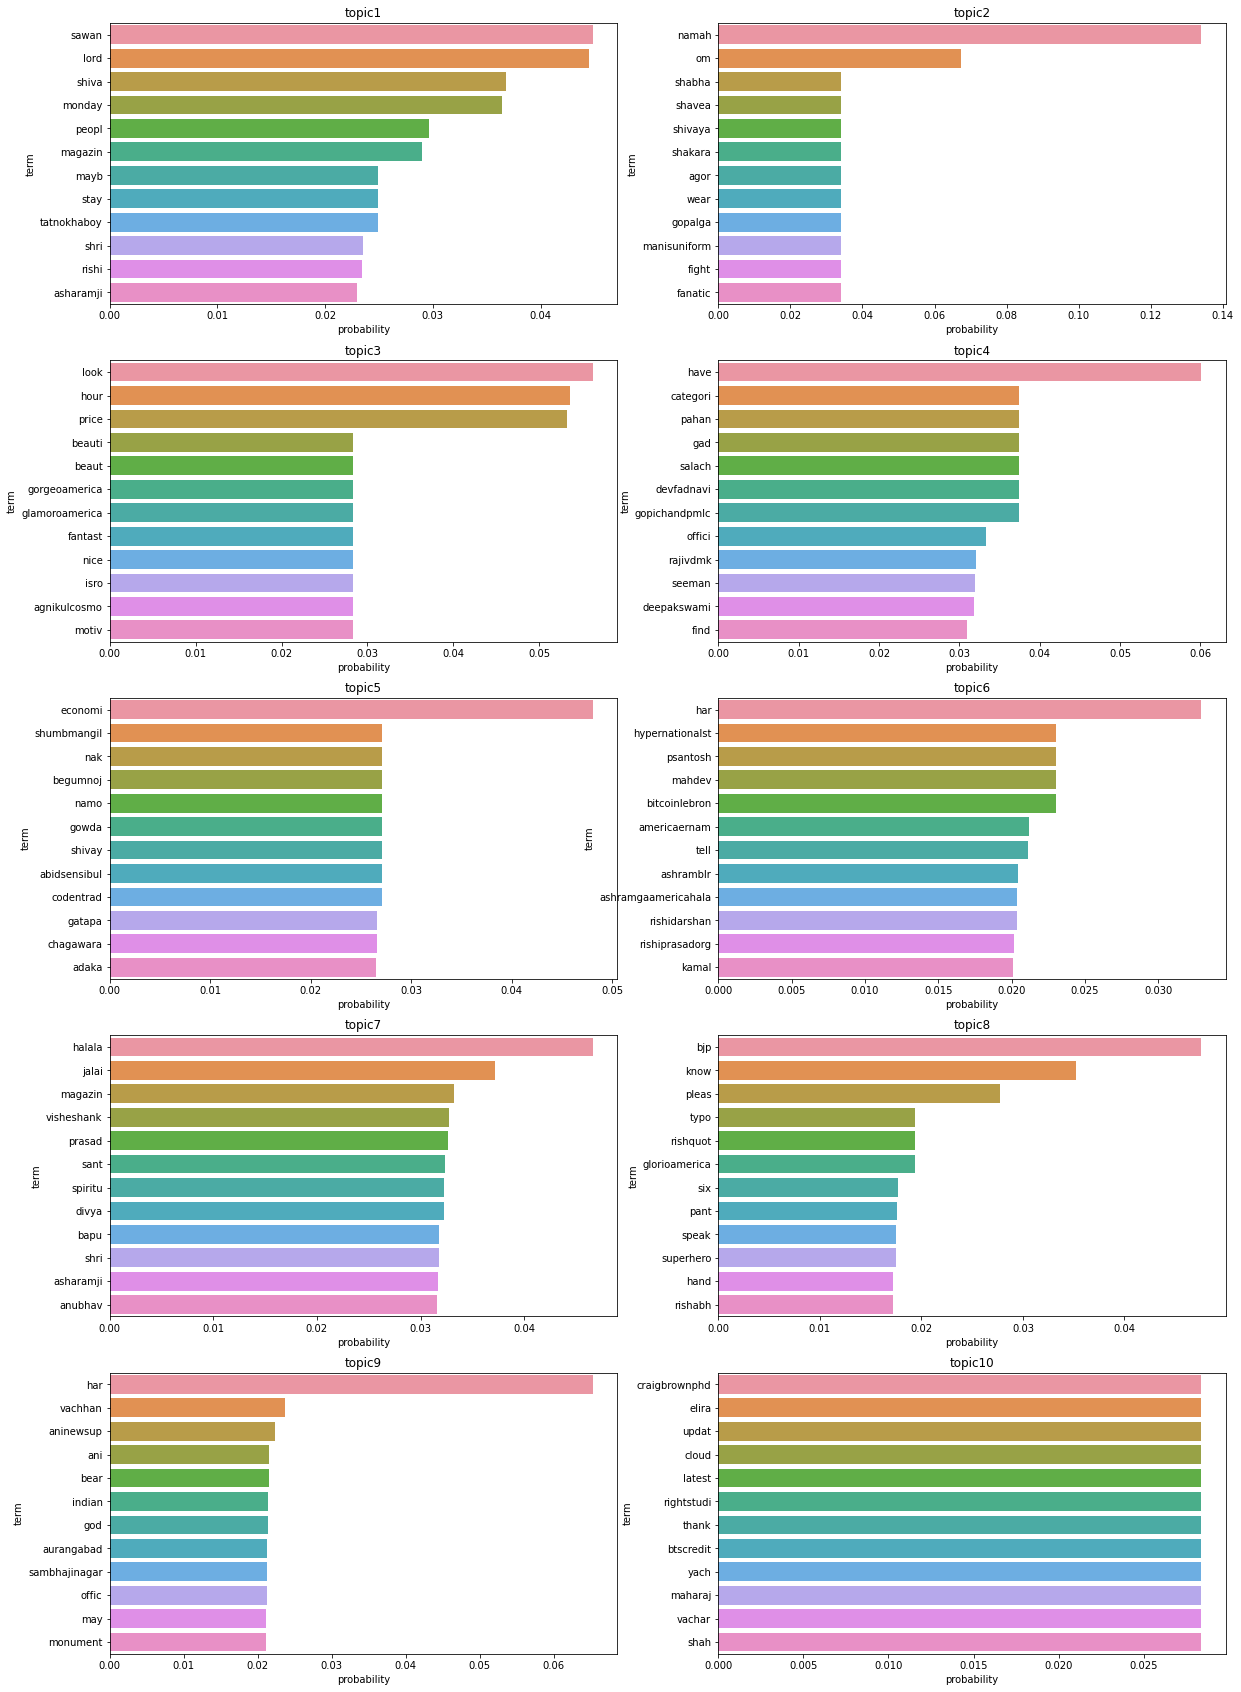

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import seaborn as sns

fig = plt.figure(figsize = (20,30))
    
for i in range(10):
    df = pd.DataFrame(lda_model_tfidf.show_topic(i,12), columns=['term','prob']).set_index('term')
    plt.subplot(5,2,i+1)
    plt.title('topic'+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df)
    plt.xlabel('probability')
plt.show()